In [1]:
import sys 
sys.path.insert(0, '..')

In [2]:
import shutil
import os 

_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)

In [3]:
from typing import * 

import numpy as np 
import pandas as pd

from server.handlers.output_data import get_species_simulation_data

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [4]:
omex_source_dir = './examples/sbml-core'
omex_name = 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is the 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Out

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505). The following is the 

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



NameError: name 'omex_source_dir' is not defined

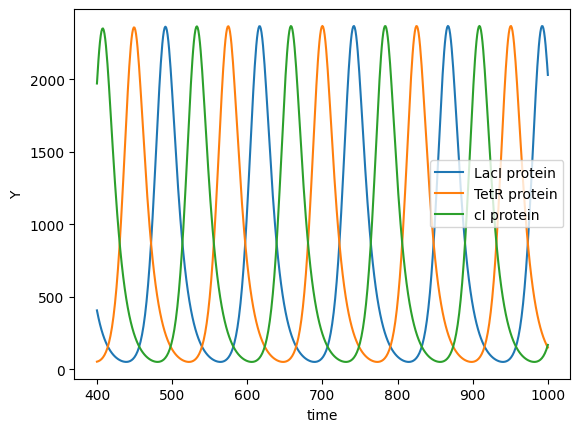

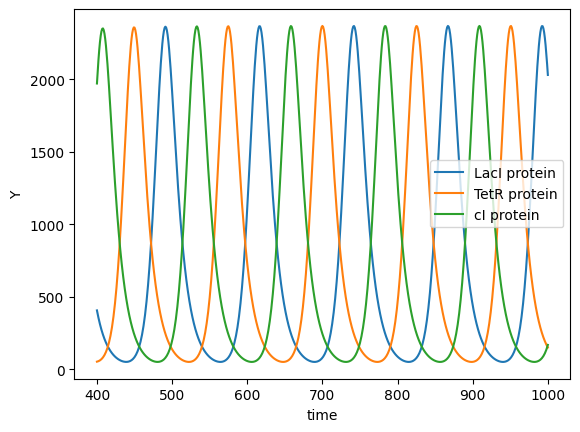

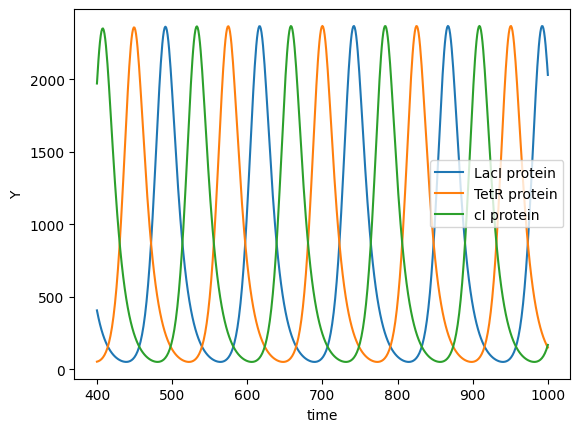

In [5]:
outs = get_species_simulation_data(omex_fp=omex_fp, species_name='cI mRNA', output_root_dir=out_dir)

In [ ]:
def calculate_mse(a, b) -> int:
    return np.mean((a - b) ** 2)


def compare_arrays(arr1: np.ndarray, arr2: np.ndarray, atol=None, rtol=None) -> bool:
    """Original methodology copied from biosimulations runutils."""
    max1 = max(arr1)
    max2 = max(arr2)
    aTol = atol or max(1e-3, max1*1e-5, max2*1e-5)
    rTol = rtol or 1e-4
    return np.allclose(arr1, arr2, rtol=rTol, atol=aTol)


def generate_matrix_data(
    outputs: List[np.ndarray],
    simulators: List[str],
    method: Union[str, any] = 'prox',
    rtol: float = None,
    atol: float = None,
    ground_truth: np.ndarray = None
    ) -> pd.DataFrame:
    """Generate a Mean Squared Error comparison matrix of arr1 and arr2, indexed by simulators by default,
        or an AllClose Tolerance routine result if `method` is set to `prox`.

        Args:
            outputs: list of output arrays.
            simulators: list of simulator names.
            method: pass one of either: `mse` to perform a mean-squared error calculation
                or `prox` to perform a pair-wise proximity tolerance test using `np.allclose(outputs[i], outputs[i+1])`.
            rtol:`float`: relative tolerance for comparison if `prox` is used.
            atol:`float`: absolute tolerance for comparison if `prox` is used.
            ground_truth: If passed, this value is compared against each simulator in simulators. Currently, this
                field is agnostic to any verified/validated source, and we trust that the user has verified it. Defaults
                to `None`.

        Returns:
            Pandas dataframe representing a comparison matrix where `i` and `j` are both indexed by the
                simulators involved. The aforementioned simulators involved will also include the `ground_truth` value
                within the indices if one is passed.
    """

    # TODO: map arrs to simulators more tightly.
    _simulators = simulators.copy()
    _outputs = outputs.copy()
    if ground_truth is not None:
        _simulators.append('ground_truth')
        _outputs.append(ground_truth)

    use_tol_method = method.lower() == 'prox'
    matrix_dtype = np.float64 if not use_tol_method else bool
    num_simulators = len(_simulators)
    mse_matrix = np.zeros((num_simulators, num_simulators), dtype=matrix_dtype)

    # fill the matrices with the calculated values
    for i in range(len(_simulators)):
        for j in range(i, len(_simulators)):
            output_i = _outputs[i]
            output_j = _outputs[j]
            method_type = method.lower()
            result = calculate_mse(output_i, output_j) if method_type == 'mse' else compare_arrays(arr1=output_i, arr2=output_j, rtol=rtol, atol=atol)
            
            mse_matrix[i, j] = result
            if i != j:
                mse_matrix[j, i] = mse_matrix[i, j]
                
    return pd.DataFrame(mse_matrix, index=_simulators, columns=_simulators)

In [ ]:
prox_matrix = generate_matrix_data(outputs=outs, simulators=['amici', 'copasi', 'tellurium'], ground_truth=ground_truth, method='prox')

prox_matrix

In [ ]:
prox_matrix = generate_matrix_data(outputs=outs, simulators=['amici', 'copasi', 'tellurium'], ground_truth=ground_truth, method='mse')

prox_matrix.plot()

In [ ]:
prox_matrix.to_dict().keys()
    